In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df=pd.read_csv(r'C:\Users\A_R_COMPUTERS\Desktop\new DS\BANhouseprice\Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Assuming some coloumns are not importtant

In [5]:
df1=df.drop(['area_type','availability','society'],1)

In [6]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df1.isnull().mean()

location      0.000075
size          0.001201
total_sqft    0.000000
bath          0.005480
balcony       0.045721
price         0.000000
dtype: float64

In [8]:
df1=df1.dropna()

In [9]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

Trying to split the size coloumns

In [10]:
df1['bhk']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df1.head(30)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00,2


In [12]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [14]:
is_float(df1['total_sqft'])

False

In [15]:
df1[~df1['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [16]:
df2=df1.copy()

In [17]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

Create a function which can take avg of two values 

In [18]:
def convert_sqft_to_num(x):
    if isinstance(x,str): 
        tokens=x.split('-')
        if len(tokens)==2:
            return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [19]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [20]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(2)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


In [21]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
df2.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
balcony               0.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [23]:
(2100 +2850)/2

2475.0

In [24]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price', 'bhk'], dtype='object')

### Create New coloum that is price per squarefit

In [25]:
df3['Price_per_squarefit']=df3['price']*100000/df3['total_sqft']

In [26]:
df3.shape

(12668, 8)

In [27]:
##finding unique values in location columm
df3['location']=df3.location.apply(lambda x: x.strip())


In [28]:
location_stat=df3.location.value_counts(ascending=True)
location_stat

Wajid layout thanisandra      1
Huttanahalli                  1
t.c palya                     1
St Thomas Town                1
Sabari Nagar                  1
                           ... 
Thanisandra                 233
Kanakpura Road              259
Electronic City             302
Sarjapur  Road              372
Whitefield                  514
Name: location, Length: 1248, dtype: int64

In [29]:
len(location_stat[location_stat<10])

1001

In [30]:
location_stat_less10=location_stat[location_stat<10]

In [31]:
location_stat_less10

Wajid layout thanisandra    1
Huttanahalli                1
t.c palya                   1
St Thomas Town              1
Sabari Nagar                1
                           ..
Chennammana Kere            9
KUDLU MAIN ROAD             9
Dodsworth Layout            9
Kamakshipalya               9
Chandra Layout              9
Name: location, Length: 1001, dtype: int64

### reducing no. of values in location coloumn

In [32]:
df3.location=df3.location.apply(lambda x: 'other' if x in location_stat_less10 else x)

In [33]:
len(df3.location.unique())

248

In [34]:
### finding houses which having less than 300 sq.ft per room
df4=df3.copy()

In [35]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_squarefit
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [36]:
df4[df4.total_sqft/df4.bhk<300]

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_squarefit
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [37]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]

In [38]:
df5.shape

(12013, 8)

In [39]:
df4.shape

(12668, 8)

In [40]:
####Removing outlier from price per sqft

In [41]:
df5.Price_per_squarefit.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: Price_per_squarefit, dtype: float64

In [42]:
###removing outlier which belongs to the the 1 std deviation 

def outlier(df):
    df_out=pd.DataFrame()
    for  key, subdf in df.groupby('location'):
        std=np.std(subdf.Price_per_squarefit)
        m=np.mean(subdf.Price_per_squarefit)
        newdf=subdf[(subdf.Price_per_squarefit>(m-std) & subdf.Price_per_squarefit<=(m+std))]
        df_out=pd.concat([df_out,newdf],ignore_index=True)
        return df_out
a=outlier(df5)

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_squarefit)
        st = np.std(subdf.Price_per_squarefit)
        reduced_df = subdf[(subdf.Price_per_squarefit>(m-st)) & (subdf.Price_per_squarefit<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(9829, 8)

In [44]:
df6.columns

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price', 'bhk',
       'Price_per_squarefit'],
      dtype='object')

In [45]:
### scater ploat for 2-3 bhk in same location
def scatter(df,location):
    bhk2=df[(df.location == location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.Price_per_squarefit,color='red')
    plt.scatter(bhk3.total_sqft,bhk3.Price_per_squarefit,color='green')
    plt.xlabel('Toatl square feet')
    plt.ylabel('Price per square feet')


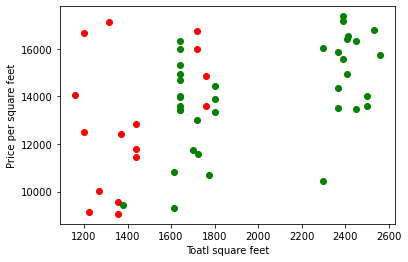

In [46]:
scatter(df6,"Rajaji Nagar")

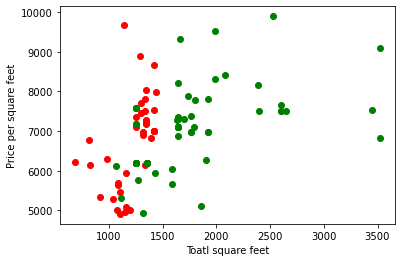

In [47]:
scatter(df6,"Hebbal")

#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [48]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_per_squarefit),
                'std': np.std(bhk_df.Price_per_squarefit),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_squarefit<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

df7.shape

(7063, 8)

Removing outliers from bathroom
We are assuming that no. bathroom should not be greater than no. rooms

In [49]:
df7[(df7.bath<df7.bhk+2)]

,location,size,total_sqft,bath,balcony,price,bhk,Price_per_squarefit
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...,...
9819,other,2 BHK,1155.0,2.0,1.0,64.0,2,5541.125541
9821,other,2 BHK,1200.0,2.0,3.0,70.0,2,5833.333333
9822,other,1 BHK,1800.0,1.0,1.0,200.0,1,11111.111111
9825,other,2 BHK,1353.0,2.0,2.0,110.0,2,8130.081301


In [50]:
df8=df7[(df7.bath<df7.bhk+2)]
df8.shape

(6996, 8)

In [51]:
df7.shape

(7063, 8)

In [52]:
df7=df7.drop(['size','Price_per_squarefit'],1)

In [53]:
df7.shape

(7063, 6)

In [54]:
dummies=pd.get_dummies(df7.location)

In [55]:
dummies.shape

(7063, 248)

In [56]:
df10=pd.concat([df7,dummies],1)
df10.shape

(7063, 254)

In [57]:
df10=df10.drop(['location','other'],1)

In [58]:
df10.shape

(7063, 252)

# MOdel building

In [59]:
X=df10.drop('price',1)

In [60]:
y=df10.price

In [61]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8572567752652056

# K- fold cross validation

In [63]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87975852, 0.80502593, 0.8031372 , 0.7945474 , 0.88786088])

# use hyper parameter tuning:-gride

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [65]:
def best_para_gv(x,y):
    algos={
        
        'linear_regression':{'model':LinearRegression(),'params': {'normalize': [True, False]}},
        'lasso':{'model':Lasso(),'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }},
        'Decision tree':{'model':DecisionTreeRegressor(),'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
          }
        
    }
    score=[]
    for algo_name,config in algos.items():
        cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        score.append({'model name':algo_name,'model score':gs.best_score_,'best_params': gs.best_params_})
    return pd.DataFrame(score,columns=['model name','model score','best_params'])
best_para_gv(X,y)


,model name,model score,best_params
0,linear_regression,0.834066,{'normalize': False}
1,lasso,0.686157,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision tree,0.732259,"{'criterion': 'mse', 'splitter': 'random'}"


In [72]:
def predict(location,sqrt,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]= sqrt
    x[1]= bath
    x[2]= bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]

In [73]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=251)

In [80]:
predict('Vijayanagar',2000,4,4)

156.28838255521075

# Export the tested model to a pickle file

In [82]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [83]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))